# Monte Carlo Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## set style
plt.style.use("ggplot") ## use plt.style.availalbe to see all styles

def summary(data):
    """ To print out summary statistics"""
    titles = " Min.:, 1st Qu.:, Median:, 3rd Qu.:, Max.:".split(",")
    percentiles = np.round(
        np.percentile(a=data, interpolation='midpoint', 
                      q=[0, 25, 50, 75, 100]), 4)
    out = dict(zip(titles, percentiles))
    mean = np.round(np.mean(a = data) )
    out.update({" Mean:" : mean})
    for k, val in out.items():
        print(k, val)
    #return out

def table(data, prob=False):
    """Count unique values
    return a tuple(value, count)"""
    vals_counts = np.unique(ar=data, return_counts=True)
    if prob:
        density = vals_counts[1] / len(data)
        vals_counts = (vals_counts[0], density)
    out = tuple(zip(*vals_counts))
    return out


## Introduction 

In addition to being able to generate random variables, we should also be able to apply these simulation methods to solve more complex problems. We'll begin with Monte Carlo Integration methods.

Topics to be covered:

1. Classic Monte Carlo Integration

2. Importance Sampling




## Monte Carlo Integration 

Given a function $h(x)$ for which we wish to integrate over region $[a,b]$, $\int_a^b h(x) dx$, we can solve this numerical problem by treating it a as a random variable we are trying to find the expectation for. Treat $X$ as a random variable with density $f(X=x)$, then the mathematical expecation of the random variable $h(X=x)$ is
$$
E[h(X)] = \int_{\mathcal{X}} h(x) f(x) dx = \theta
$$

If a random sample $X_1, ..., X_n$ is generated from $f(x)$, an unbiased estimator of $E[h(X)]$ is the sample mean. Review: [Sample mean][1]

$$
\displaystyle \bar{h}_{n} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} h(x_i)
$$


## Monte Carlo Integration 

Suppose we have a function $h(x) = 3x^2$ for which we wish to integrate over the interval $[0, 2]$.

- Can apply deterministic numerical approximation methods (see R's `integrate`) 

- or we could treat $x$ as a random variable, $X = x$, from a $Unif(0,2)$ whose pdf is simply $f(x) = \frac{1}{2-0} = \frac{1}{2}$. 

If we now generate some $n$ random values from $f(x)$ and evaluate them at $h(x)$, then take the mean, we'd be calculating the expected value of $h(x)$, 
$$
\begin{aligned}
\ \theta &= \int_0^2 h(x) dx \\
\ &= (\frac{2 - 0}{2 - 0}) \times \int_0^2 h(x) dx = 2 \times \int_0^2 h(x) \frac{1}{2} dx \\
\ &= 2 \times E[h(X)] = 2 \times \int_{- \infty}^{\infty} h(x) f(x) dx \\
\ &\approx  2 \times \frac{1}{n} \displaystyle\sum_{i=1}^{n} h(x_i)  \\
\ &= \hat{\theta} \approx \theta
\end{aligned}
$$



## Monte Carlo Integration 

If we now simulate this, we will see we approximate the true solution $\int_0^2h(x) dx = 8$



In [2]:
from scipy import integrate

n = 50000
h = lambda x: 3*x**2
X = np.random.uniform(size=n, low = 0, high = 2)
v = 2 * np.mean(h(X)) ## 2 * E[h(x)]
print(v)

quad_integration = integrate.quad(h, 0, 2) ## returns value and error
print(quad_integration[0]) 



8.04015085418
8.0



## Monte Carlo Integration


Now, to generalize the method used. Given a function $h(x)$ whose integral is well defined, where we wish to evaluate at interval $a$ to $b$. Then

$$
\begin{aligned}
\ \theta &= \int_a^b h(x) dx \\
\ &= (b - a) \int_a^b h(x) \frac{1}{b - a} dx \\
\ &= (b - a) \int_a^b h(x) f(x) dx \\
\end{aligned}
$$
where $f(x) = \frac{1}{b - a}$ is $Unif(a,b)$, and $x \sim Unif(a,b)$. 

The algorithm to calculate $\hat{\theta}$ is as follows:

1. Find a density $f(x)$ from which we can sample $x$ 

2. Generate $x_1, ..., x_n \sim f(x)$

3. Compute $(b - a) \times \bar{g}_{n}$, where $\bar{g}_{n} = \frac{1}{n} \sum_{i = 1}^n h(x_i)$




## Monte Carlo Integration, Variance Estimation 


Now that we can calculate an estimate of statistic $\theta$, $\hat{\theta}$, we should also be able to calculate the standard error in order to build confidence intervals (CIs).

The variance can be written as 
$$
Var(x) = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (x_i - \theta)^2
$$

We will use this form to calculate the variance of $\hat{\theta}$

$$
\begin{aligned}
\ & Var(h(x_i)) \\
\ & = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (g(x_i) - \hat{\theta})^2 \\
\ & = \sigma^2
\end{aligned}
$$
And 
$$
 \begin{aligned}
\ & \frac{\sigma^2}{n} = \frac{1}{n^2} \displaystyle\sum_{i=1}^{n} (h(x_i) - \hat{\theta})^2 \\
\end{aligned}
$$



## Monte Carlo Integration, Variance Estimation

So, the standard error estimate is
$$
 \begin{aligned}
\ & \frac{\sigma}{\sqrt{n}} = \frac{1}{n} \displaystyle \sqrt{ \sum_{i=1}^{n} (h(x_i) - \hat{\theta})^2 } \\
\end{aligned}
$$

which we can then use to construct 95% confidence intervals

$$
\hat{\theta} \pm 1.96 \times \frac{\sigma}{\sqrt{n}}
$$





## Monte Carlo Integration, Variance Estimation 

We can now calculate the standard error for the former example.



In [3]:
h_values = 2 * h(X)

def cumMean(data):
    m = len(data)
    result = np.cumsum(data) / np.arange(1, m+1)
    return result

def cumSE(data):
    m = len(data)
    mu = np.mean(data)
    num = np.sqrt(np.cumsum((data - mu)**2))
    denom = range(1, m+1)
    result = num/denom ## cummulative mean of (x_i - theta)**2
    return result


## Monte Carlo Integration, Variance Estimation 

In [4]:
thetas = cumMean(h_values)
SE = cumSE(h_values)

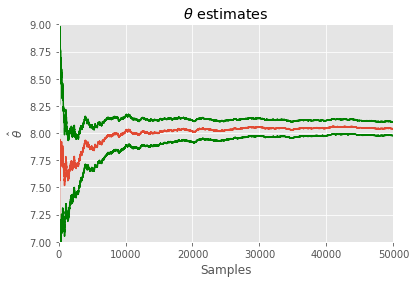

 Min.: 0.1012
 1st Qu.: 8.0027
 Median: 8.0352
 3rd Qu.: 8.0456
 Max.: 8.3026
 Mean: 8.0


In [5]:
plt.plot(thetas)
plt.plot(thetas + 1.96*SE, c = "green") ## uper CI
plt.plot(thetas - 1.96*SE, c = 'green') ## lower CI
plt.ylim((7, 9)) 
plt.xlim((1, n))
plt.title(r"$\theta$ estimates")
plt.ylabel(r"$\hat{\theta}$")
plt.xlabel("Samples")
plt.show()

summary(thetas)



The plot shows how our parameter estimate (and CI) converges closer to the true value as N (sample size) increases. If we were to have had a small sample size, say, 100, our parameter esimate would have performed poorly. But at $N = 10,000$, our estimate $\hat{\theta}$ performs well.



## Strong Law of Large Numbers 

Monte Carlo Integration relies on the Strong Law of Large Numbers (SLLN) to approximate $E_f[h(X)] = \int_{\mathcal{X}} h(x) f(x) dx$. The method is to generate a sample $\mathbf{X} = (x_1, ..., x_n)$ from pdf $f(x)$ and use the empirical average of $h(x)$ as an approximation. This Monte Carlo estimate *almost surely* converges to $E_f[h(X)]$ by the SLLN. 


For a given random sample $X_1, ..., X_n$ the empirical mean, $\bar{X}$, can be used as an estimator for $E[x] = \mu$, and given a *sufficiently* large sample, this estimate approximates the true expectation $\mu$ almost certainly with a probability value of 1. Or more formally, 

$$
P(\lim_{n \to \infty} \bar{X} \to E[X]) = 1 
$$


See reference: [Strong Law of Large Numbers][2]



## Central Limit Theorem 

The CLT implies that for our Monte Carlo estimator $\hat{\theta}$,

$$
\frac{\hat{\theta} - E[\hat{\theta}]}{\sqrt{Var(\hat{\theta})}} \sim N(0,1)
$$
and by the Strong Law of Large Numbers this happens almost surely as $n \to \infty$. See: [Central Limit Theorem](http://www.math.uah.edu/stat/sample/CLT.html)

$$
\hat{\theta} \sim N(\theta, \sigma^2)
$$

The Weak Law of Large Numbers then states that for any margine of error $\epsilon$, the average almost surely do not deviate further than $\epsilon$ away from the true $\theta$, 
$$
\lim_{n \to \infty} P(| \hat{\theta} - \theta | > \epsilon) = 0
$$

The SLLN speaks to convergence to the expected value, where the WLLN speaks to convergence in probability.






##  Normal p-value estimate for unbounded region  


We will next explore how to generate $N(\mu, \sigma)$ p-values using a $Unif(0,x)$ distribution. 

$$
\Phi(x) = P(X \leq x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2 \pi} \sigma}\ e^{(t - \mu)^2/ 2 \sigma} dx
$$

Now, suppose that $\mu = 0$ and $\sigma = 1$, such that we are only dealing with the standard Normal CDF. We are interested in calculating a Monte Carlo estimate for $\Phi(x)$

$$
\Phi(x) = P(X \leq x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2 \pi}}\ e^{t^2/ 2} dx
$$




##  Normal p-value estimate for unbounded region  

Our first problem is dealing with bounds $(-\infty, x)$. We cannot direcly apply our MC integration algorithm directly because the integral range $(-\infty, x)$

A solution around this issue is breaking up this problem into two sections exploiting the Normal distribution's symmetry around $\mu$. 

The two sections will be $(-\infty, 0)$ and $(0, x)$. 

With the given symmetry property, we know that any random variable from $N(\mu, \sigma)$ will have an equal probability of being on the positive end or negative. Thus, let's set $P(X \leq 0) = 1/2$. Now, all we need to concern ourselves with is the region $(0, x)$. 

Now, assuming $x > 0$, then we use the Monte Carlo estimator as is 
$$
\begin{aligned}
\Phi(x) &= P(X \leq x) \\
\ & = P(X \leq 0) + \int_{0}^{x} \frac{1}{\sqrt{2 \pi}}\ e^{t^2/ 2} dx \\
\ & = \frac{1}{2} + \int_{0}^{x} \frac{1}{\sqrt{2 \pi}}\ e^{t^2/ 2} dx \\
\end{aligned}
$$



##  Normal p-value estimate for unbounded region  

However, if $x < 0$ such as $x = -1$, then we would use the symmetry property of the Normal distribution to calculate $\Phi(-1)$ by $1 - \Phi(-(-1)) = 1 - \Phi(1)$


In [6]:
from scipy import stats
dnorm = lambda x: stats.norm.pdf(x, loc = 0, scale = 1) ## standard normal pdf
x = np.linspace(start=-10, stop=10, num=1000)

out = dnorm(x) 
out[x > -1] = 0

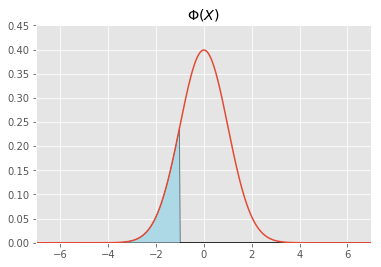

In [7]:
fig, ax = plt.subplots() ## needed to add polygon
plt.plot(x, dnorm(x))
plt.ylim((0, 0.45))
plt.xlim((-7, 7))
p = plt.Polygon(xy=list(zip(x, out)), facecolor='lightblue', edgecolor='0.1') ## add polygon
ax.add_patch(p)
plt.title(r"$\Phi(X)$")
plt.show()

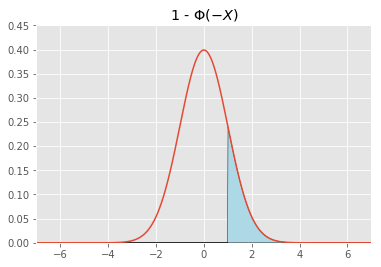

In [8]:
x = np.linspace(start=-10, stop=10, num=1000)

out = dnorm(x) 
out[x < 1] = 0

fig, ax = plt.subplots() ## needed to add polygon
plt.plot(x, dnorm(x))
plt.ylim((0, 0.45))
plt.xlim((-7, 7))
p = plt.Polygon(xy=list(zip(x, out)), facecolor='lightblue', edgecolor='0.1') ## add polygon
ax.add_patch(p)
plt.title(r"1 - $\Phi(-X)$")
plt.show()

##  Normal p-value estimate for unbounded region  

For example, if $x = 2.5$, then we would calculate a MC estimate for $\Phi(X \leq 2.5)$.


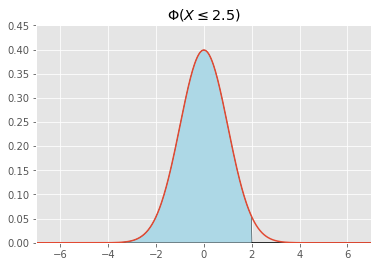

In [9]:
x = np.linspace(start=-10, stop=10, num=1000)

out = dnorm(x) 
out[x >=2 ] = 0

fig, ax = plt.subplots() ## needed to add polygon
plt.plot(x, dnorm(x))
plt.ylim((0, 0.45))
plt.xlim((-7, 7))
p = plt.Polygon(xy=list(zip(x, out)), facecolor='lightblue', edgecolor='0.1') ## add polygon
ax.add_patch(p)
plt.title(r"$\Phi(X \leq 2.5)$")
plt.show()


##  Normal p-value estimate for unbounded region


Suppose we'd like to calculate $\Phi(2.5) = P(X \leq 2.5)$


In [10]:
n = 10**6
x = 2.5
t = np.random.uniform(size=n, low=0, high=2.5)
p = 0.5 + 1/np.sqrt(2*np.pi) * np.mean(x * np.exp(-t**2 / 2))

print(p)
print(stats.norm.cdf(x=2.5))

0.993776842052
0.993790334674



##  Normal p-value estimate for unbounded region 

In the above example, we simulated from a $Unif(0,2.5)$ distribution. But if we'd like to maintain a general algorithm from which we are interested in generating all samples from $Unif(0,1)$ distribution, then we'd make a slight variable change. In order to calculate $P(X \leq x) = \theta$,
$$
\begin{aligned}
\theta & = \displaystyle \int_{-\infty}^{x} \frac{1}{\sqrt{2 \pi}} e^{-t^2/2} dt \\ 
\ & = \displaystyle \frac{1}{2} + \int_{0}^{x} \frac{1}{\sqrt{2 \pi}} e^{-t^2/2} \times \frac{x}{x} \times dt \\ 
\ & = \displaystyle \frac{1}{2} + \int_{0}^{1} x \frac{1}{\sqrt{2 \pi}} e^{-t^2/2} \frac{1}{x}dt \\ 
\end{aligned}
$$


##  Normal p-value estimate for unbounded region 

and let $Y = t/x \to t = xY$ such that

$$
\begin{aligned}
\ & = \displaystyle \frac{1}{2} + \frac{1}{\sqrt{2 \pi}} \int_{0}^{1} x e^{-(x \times Y)^2/2} \frac{1}{x} dy \\
\ & \approx \displaystyle \frac{1}{2} + \frac{1}{\sqrt{2 \pi}} \frac{1}{N} \sum_{i=1}^{N} x_i  e^{-(x_i \times Y)^2/2} \\
\ & = \hat{\theta}
\end{aligned}
$$
for $x > 0$ and $x_i \sim Unif(0,1)$.






## Calculating N(0,1) tail probabilities 

Calculating tail probabilities can be tricky. 
Suppose $Z \sim N(0,1)$, then $\Phi(x) = P(Z \geq x) = E[I_{Z \geq x}] \approx \frac{1}{N}\sum_{i=1}^N I_{z_i \geq x}$ where $I$ is an indicator function returning 1 if the condition is satisfied, else 0.


Variance estimation will be problematic for rare events like these



In [11]:
n = 10000
x = 3.2
z = np.random.normal(size=n)
p_val = np.mean(z >= x)
print(p_val) ## MC p-value
print(sum(z > x)) ## few samples with z > x

0.0004
4



## Importance Sampling  

Our Monte Carlo integration algorithm looks like
$$
\begin{aligned}
E[h(x)] & = \int_{\mathcal{X}} h(x) f(x) dx = \theta
\end{aligned}
$$
Where $f$ is generally a uniform density. However, this can be costly if we need to calculate the tail probabilities. For example, say $Z \sim N(0,1)$ and we wish to calculate $P(Z > 4.5)$. 

In order to obtain a stable result using a uniform distribution for $f$ we would need to simulate many, many samples. This can be time and computationally costly, and this process can be improved. 

Solution: we can weight samples $x$ by density $g$ such that this would improve results for tail probabilities. 



## Importance Sampling  

We can rewrite our previous result as 
$$
\begin{aligned}
E[h(x)] & = \int_{\mathcal{X}} h(x) f(x) dx \\
\ & = \int_{\mathcal{X}} h(x) \frac{f(x)}{g(x)} g(x) dx \\
\ & \displaystyle E[\frac{h(x) f(x)}{g(x)}] \\
\ & = \theta
\end{aligned}
$$



##  Calculating tail probabilities  


Given $x \sim N(0,1)$ with a sample of size $N$, the approximation of 
$$
\begin{aligned}
\Phi(x) = \displaystyle \int^{\infty}_x \frac{1}{\sqrt{2 \pi}} e^{-t^2/2}  dt
\end{aligned}
$$
By Monte Carlo integration we approximate $P(X \geq x)$ by 
$$
\begin{aligned}
\Phi(x) = \displaystyle \frac{1}{N} \sum_{i = 1}^N I_{\{t_i \geq x\}}
\end{aligned}
$$


In [12]:
n = 10**6
x = 4
t = np.random.normal(n) >= x ## looking at the lower tail
p_val = np.sum(t)/n
print(np.sum(t))
print(format(p_val, '0.7f'))

## compare with
print(1 - stats.norm.cdf(x=x))

1
0.0000010
3.16712418331e-05


In the above example, with $N = 10,000$ samples, we saw only 1 observation with $x \geq 4$. To have a stable answer (and variance), we will need to see more samples at this tail. Thus, we turn to importance sampling.



##  Calculating tail probabilities 

For an instrumental importance density, we will need to use a density with a long and heavy tail. Some examples of heavy-tailed distributions are Student's t, Chi-squared and exponential density. We will use the latter for its simplicity and memoryless property.

To continue with the above example, we'll first define our functions $h$, $f$, and $g$ to be 1, $N(0,1)$ and $Exp(1)$ truncated at 4. Our instrumental importance function $g$ will be of the form $p(x | x \geq 4 ) = p(x)/p(x \geq 4) = p(x-4)$. See below a workout of the math, and this link for more information of the [memoryless property](http://pages.cs.wisc.edu/~dsmyers/cs547/lecture_9_memoryless_property.pdf)
$$
\begin{aligned}
\ g(x) & =  \displaystyle \frac{e^{-x} }{\int_4^{\infty} e^{-x} dx} \\
\ & = e^{-x} \frac{1}{-e^{-\infty} + e^{-4}} \\
\ & = e^{-x} \frac{1}{e^{-4}} \\
\ & = e^{-x} e^{4} \\
\ & = e^{-x+4}\\
\ & = e^{-(x-4)}\\
\end{aligned}
$$


##  Calculating tail probabilities 


$$
\begin{aligned}
\ \frac{h(x_i) f(x_i)}{g(x_i)} & = \frac{1}{\sqrt{2 \pi}} e^{-x_i^2 / 2} \times e^{-(x_i - 4)} \\
\ & = \frac{1}{\sqrt{2 \pi}} e^{-x_i^2 / 2 \ -\ (x_i - 4)} \\
\ & = \frac{1}{\sqrt{2 \pi}} e^{-( x_i^2 / 2 \ + \ x_i - 4)} \\
\end{aligned}
$$

Finally, we can now begin to generate samples from $g$, and use the arithmetic mean to calculate our p-value.

$$
\begin{aligned}
\displaystyle E \left[\frac{h(x) f(x)}{g(x)} \right] & = \frac{1}{N} \times \frac{1}{\sqrt{2 \pi}} \sum_{i = 1}^N e^{-( x_i^2 / 2 \ + \ x_i - 4)} \\
\end{aligned}
$$



In [13]:
n = 1000
t = 4
X = np.random.exponential(size=n, scale=1) + t
w = stats.norm.pdf(X)/stats.expon.pdf(X - t) ## importance sampling weights dnorm/dexp(x-4)

theta = np.mean(w)
cumTheta = np.cumsum(w) / range(1, n+1)

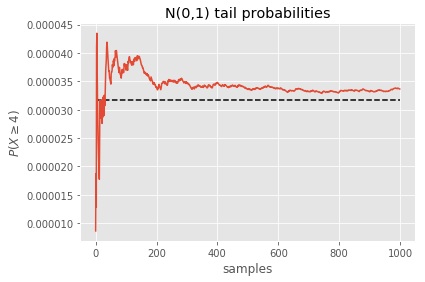

In [14]:
plt.plot(cumTheta)
plt.title("N(0,1) tail probabilities")
plt.ylabel(r"$P(X \geq 4)$")
plt.xlabel("samples")
plt.hlines(y= 1- stats.norm.cdf(x=t), xmin = 0, xmax = n, linestyle = '--')
plt.show()


##  Calculating Expectation of Laplace Distribution 

Suppose we have a random variable $X \sim f(x | \mu, b)$, which is the Laplace or Double Exponential distribution.
$$
f(x) = \frac{1}{2b} exp\{ - \ \frac{| x - a| }{b} \}, \ x \in (0, \infty)
$$

If we let $a = 0$ and $b = 1$, then $f(x) = \frac{1}{2} e^{-| x |}$.

Then, if we would want to calculate $E[X^2]$, then we would need to solve the integral. 

$$
\begin{aligned}
E[X^2] & = \displaystyle \int_{-\infty}^{\infty} x^2 f(x) dx \\
\ & = \int_{-\infty}^{\infty} x^2 \frac{1}{2b} e^{ - | x| } dx \\
\end{aligned}
$$


##  Calculating Expectation of Laplace Distribution  

Suppose (for whatever reason) we are unable to generate samples from an exponential distribution. But (for whatever reason) we are able to generate samples $x_i \sim N(0,\sigma)$. Then, we could use $N(0,\sigma)$ as our instrumental density to sample from and use the importance weights $w_i = f(x_i)/g(x_i)$ to improve the convergence to $f$. Let's try $\sigma = 4$



In [27]:
dlaplace = lambda v: (1/2) * np.exp(-1 * np.abs(v))
dnorm = stats.norm.pdf

x = np.linspace(start=-10, stop=10, num=1000)

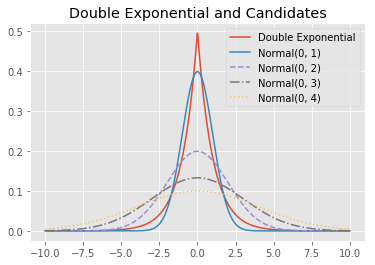

In [28]:
plts = plt.plot(x, dlaplace(x))
#plt.plot(x, dnorm(x, loc = 0, scale = 1), linestyle = '--')
linestyles = ['-', '--', '-.', ':']
for i, ls in enumerate(linestyles):
    tmp, = plt.plot(x, dnorm(x, loc = 0, scale = i+1), linestyle=ls)
    plts.append(tmp)
plt.title("Double Exponential and Candidates")
lines = ["Double Exponential"] + ["Normal(0, {0})".format(i) for i in range(1,5)]
plt.legend(plts, lines)
plt.show()



##  Calculating Expectation of Laplace Distribution  

Since we need to have samples that cover the entire domain of the Laplace distribution, it makes sense to set $\sigma$ higher than 1. Otherwise, we would need  many, many samples to obtain a stable answer.



In [17]:
n = 60000
## sd = 1
x = np.random.normal(size = n, loc = 0, scale = 1)
w = dlaplace(x) / dnorm(x, scale=1)
theta1 = np.mean(x**2 * w)
print(theta1)

## sd = 2
x = np.random.normal(size = n, loc = 0, scale = 2)
w = dlaplace(x) / dnorm(x, scale=2)
theta2 = np.mean(x**2 * w)
print(theta2)


## sd = 4
x = np.random.normal(size = n, loc = 0, scale = 4)
w = dlaplace(x) / dnorm(x, scale=4)
theta2 = np.mean(x**2 * w)
print(theta2)


1.78834063449
1.9658158879
2.00239750897



##  Calculating Expectation of Laplace Distribution  


Now to compare this using samples generated from an $Exp(1)$ distribution. We generate a double exponential from an exponential distribution by generating $N$ random variables from $Exp(1)$ then splitting up the distribution (randomly & evenly in approximately half) between the left and right sides of $\mu = 0$. Our importance weights in this case would just be $w_i = 1$. See reference [Double Exponential](http://www.itl.nist.gov/div898/handbook/eda/section3/eda366c.htm)


Python's `Numpy` module has a laplace distribution we can sample directly from.


In [18]:
laplace_samples = np.random.laplace(size=n, loc=0, scale=1)
print(np.mean(laplace_samples**2))

2.0271300183


Using a candidate distribution with sd = 4 results in a similar answer to sampling directly from the laplace distribution


## Importance Sampling Resampling  


Sampling Importance Resampling (SIR) simulates random variables approximately from the target distribution. SIR is based upon the notion of importance sampling and nonparametric bootstrapping. 

Briefly, importance sampling proceeds by sampling from an importance sampling distribution $g$, where $g$ is the envelope or instrumental distribution. If needed, each point in the sample is weighted to correct the sampling porbabilities so that the weighted sample can be related to the target density $f$. 

As seen previously, the weighted sample can be used to estimate expectations under $f$.


## Importance Sampling Resampling  

For the target density $f$, the weights used to correct sampling probabilities are called the *standardized importance weights*. Since the initial weights $w_i = f(x_i)/g(x_i)$ to not sum to 1, we have to normalize them and thus we obtain
$$
\begin{aligned}
\displaystyle w^*_i & = \frac{w_i}{\sum_{i = 1}^n w_i} \\
\ \displaystyle & = \frac{f(x_i)/g(x_i)}{\sum_{i = 1}^n f(x_i)/g(x_i)} \\
\end{aligned}
$$
for a sample of random variables $x_1, ..., x_n \sim g(x)$.  


## Importance Sampling Resampling 

We may view importance sampling as approximating $f$ by the discrete distribution having mass $w_i$ on each observed sample point $x_i$. The SIR algorithm can be described as follows

1. Sample $x_1, ..., x_n \sim g(x)$

2. Calculate the standardized importance weights $w^*_i = \displaystyle \frac{f(x_i)/g(x_i)}{\sum_{i = 1}^n f(x_i)/g(x_i)}$

3. Resample $y_1, ..., y_n$ with replacement with probability $w_i$ (or $w^*_i$).

A random variable $X$ drawn with the SIR algorithm has a distribution that converges to $f$ as $m \to \infty$. 


This method introduces some bias to the estimate we are trying to calculate, but for large samples, it is usually negligible.



## Tail Probabilities of a *t*-distribution  

A good candidate for sampling from a tail distribution is the $Exp(\theta)$ distribution. We can generate random variables from a left truncated exponential distribution, $Y \sim Exp^+(\alpha, \theta)$, by simply shifting $X \sim Exp(\theta)$ values by $\alpha$. Thus, $Y = X + \alpha$



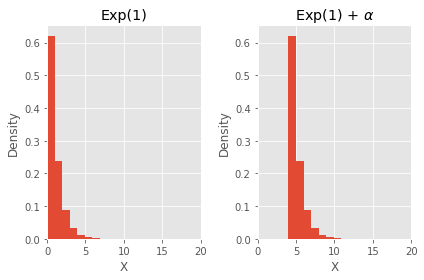

In [19]:
n = 5*10**4
x = np.random.exponential(size=n, scale = 1) ## generate exponential samples
alpha = 4 ## shifting parameter
y = x + alpha ## truncated exponential samples


plt.subplot(1, 2, 1)
w = np.ones_like(x) / n ## normalizing weights for density plot
plt.hist(x, weights = w)
plt.xlim((0, 20))
plt.ylabel("Density")
plt.xlabel("X")
plt.title("Exp(1)")

plt.subplot(1, 2, 2)
plt.hist(y, weights = w)
plt.ylabel("Density")
plt.xlabel("X")
plt.xlim((0, 20))
plt.title(r"Exp(1) + $\alpha$")

plt.tight_layout()
plt.show()

## Tail Probabilities of a *t*-distribution 

Using the truncated exponential distribution, we can use $Exp^+(\alpha, \theta)$ as our importance function for calculating the tail probabilities 

In [30]:
x = np.random.exponential(size = n, scale = 1)
alpha = 10
y = x + alpha
w = stats.t.pdf(x=y, df = 5) / stats.expon.pdf(x=(y-alpha), scale = 1)
MC_p_val = np.mean(w)

deterministic_p_val = integrate.quad(lambda x: stats.t.pdf(x, df = 5), alpha, np.infty) ## returns value and error

print(MC_p_val)
print(deterministic_p_val[0])
pval = 1 - stats.t.cdf(x = alpha, df = 5)
print(pval)
#print(pt(q = 10, df = 5, lower.tail = FALSE))

8.4530398932e-05
8.547378787148213e-05
8.54737878715e-05


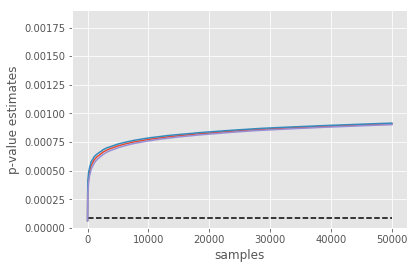

In [31]:
pvals = np.cumsum(w / range(1, n+1))
stderr = np.sqrt(np.cumsum((w - pvals)**2)) / range(1, n+1)

plt.plot(range(1, n+1), pvals)
plt.ylabel("p-value estimates")
plt.xlabel("samples")
plt.plot(range(1, n+1), pvals + 1.96*stderr)
plt.plot(range(1, n+1), pvals - 1.96*stderr)
plt.hlines(pval, linestyles='--', xmin = 0, xmax = n)
plt.ylim((0.0, 0.0019))
plt.show()



## Normal-Cauchy Bayes estimator 

For a single Normal observation $x = 2.5$, where $x \sim N(\theta, 1)$ with a Cauchy prior on its mean, $\theta \sim C(0,1)$, estimate the posterior distribution and mean.


The Bayes formula to obtain the posterior distribution is given by
$$
\displaystyle \pi(\theta | x) = \frac{f(x|\theta) \times \pi(\theta)}{m(x)}
$$
where $f(x | \theta)$ is the likelihood function, $\pi(\theta)$ is the prior distribution and $m(x)$ is the marginal distribution of $x$. We calculate $\displaystyle m(x) = \int_{-\infty}^{\infty} f(x|\theta) \times \pi(\theta) d \theta$. The standard Cauchy distribution has pdf
$$
\pi(\theta) = \frac{1}{\pi \times 1 + \theta^2}
$$

The likelihood is obtained by the following
$$
f(x | \theta) = \frac{1}{\sqrt{2 \pi}} exp(-\frac{1}{2} (x - \theta)^2)
$$



## Normal-Cauchy Bayes estimator  


Therefore,
$$
\begin{aligned}
f(x|\theta) \times \pi(\theta) & = \frac{1}{\sqrt{2 \pi}} exp(-\frac{1}{2} (x - \theta)^2) \times \frac{1}{\pi \times 1 + \theta^2} \\
\ & = (2 \pi)^{-1/2} \pi^{-1} exp(-\frac{1}{2} (x - \theta)^2) ( 1 + \theta^2)^{-1} \\
\ & \propto exp(-\frac{1}{2} (x - \theta)^2) ( 1 + \theta^2)^{-1} \\
\end{aligned}
$$

Next, we obtain our marginal distribution $m(x)$
$$
\begin{aligned}
\displaystyle m(x) & = \int_{-\infty}^{\infty} f(x|\theta) \times \pi(\theta) d \theta \\
\ & = \int_{-\infty}^{\infty} exp(-\frac{1}{2} (x - \theta)^2) \times ( 1 + \theta^2)^{-1} d \theta \\
\end{aligned}
$$
where the first component of that integral is proportional to $N(x, 1)$. Therefore, we can estimate the $m(x)$, and posterior distribution, by sampling $\theta \sim N(x,1)$ and weighting the values through a Cauchy density function.



## Normal-Cauchy Bayes estimator 

$$
\displaystyle
p(\theta | \mathbf{x}) = \frac{1}{(1 + \theta^2)} e^{-(x - \theta)^2 / 2} \big/ \int_{-\infty}^{\infty} \frac{1}{( 1 + \theta^2)} e^{ (x - \theta)^2) /2}  d \theta
$$

Note that the posterior can also be interpreted as a self-normalized importance sampling approximation with the importance function being the normal density and the importance ratio being equal to $\frac{1}{(1 + \theta^2)}$





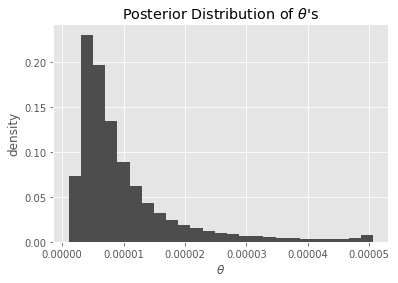

In [22]:
N = 10**5
X = 2.5

thetas = np.random.normal(size=N, loc=X, scale = 1)
weights = stats.cauchy.pdf(thetas, loc = 0, scale = 1) ## 1/(pi * (1 + s^2))
sumOfWeights = np.sum(weights)

posteriorDist =  (weights )/(sumOfWeights)

w = np.ones_like(posteriorDist) / N
plt.hist(posteriorDist, weights=w, bins = 25, color='0.3')
plt.title(r"Posterior Distribution of $\theta$'s")
plt.xlabel(r"$\theta$")
plt.ylabel("density")
plt.show()

## Normal-Cauchy Bayes estimator  



The mean of the posterior distribution is calcaulated by
$$
E(\theta | x) = \int_{-\infty}^{\infty} \theta \times \frac{ exp(-\frac{1}{2} (x - \theta)^2) \times ( 1 + \theta^2)^{-1}}{m(x)} d \theta \\
$$

where

$$
\begin{aligned}
\displaystyle m(x) & = \int_{-\infty}^{\infty} exp(-\frac{1}{2} (x - \theta)^2) \times ( 1 + \theta^2)^{-1} d \theta \\
\end{aligned}
$$



## Normal-Cauchy Bayes estimator


Therefore the expectation of the mean of $\theta$ is given by

$$
\displaystyle
E(\theta | x) \approx \sum_{i=1}^n \frac{\theta_i}{(1 + \theta_i^2)} e^{-(x - \theta_i)^2 / 2} \big/ \sum_{i=1}^n \frac{1}{( 1 + \theta_i^2)} e^{ (x - \theta_i)^2) /2} 
$$




In [23]:
## The expectation of the posterior distribution
posteriorThetaEst = np.sum((thetas * weights)/ sumOfWeights)
print(posteriorThetaEst)

## Effective Sample Size
ESS = 1 / np.sum( (weights / sumOfWeights)**2) ## Effective Sample Size
print(ESS)


1.74870569719
56391.3994984


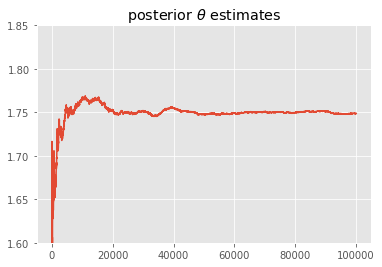

In [24]:
posteriorTheta = np.cumsum(thetas * weights) / np.cumsum(weights)

plt.plot(posteriorTheta)  
plt.title(r"posterior $\theta$ estimates")
plt.ylim((1.6, 1.85))
plt.show()
         